<a href="https://colab.research.google.com/github/MayorKing13/var_tipo_cambio/blob/main/Tipo_de_cambio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
tipo_de_cambio = pd.read_excel('https://www.bch.hn/estadisticos/GIE/LIBTipo%20de%20cambio/Precio%20Promedio%20Diario%20del%20D%C3%B3lar.xlsx')


In [ ]:
#Miremos como está el dataset antes de hacer cualquier tratamiento
tipo_de_cambio

,Banco Central de Honduras,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Subgerencia de Estudios Económicos,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Precio Promedio del Dólar de los Estados Unido...,NaN,NaN,NaN,NaN
3,Serie Diaria 2000-2023,NaN,NaN,NaN,NaN
4,(Lempiras por US$1.00),NaN,NaN,NaN,NaN
...,...,...,...,...,...
6288,1/ Corresponde al Tipo de Cambio de Referencia...,NaN,NaN,NaN,NaN
6289,"2/ El tipo de cambio mensual, es el promedio s...",NaN,NaN,NaN,NaN
6290,3/ Promedio simple de los días transcurridos.,NaN,NaN,NaN,NaN
6291,Fecha de actualización: 23/10/2023,NaN,NaN,NaN,NaN


Se observan registros que no muestran datos, así que vamos a ver los primeros 15 registros

In [ ]:
tipo_de_cambio.head(15)

,Banco Central de Honduras,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Subgerencia de Estudios Económicos,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Precio Promedio del Dólar de los Estados Unido...,NaN,NaN,NaN,NaN
3,Serie Diaria 2000-2023,NaN,NaN,NaN,NaN
4,(Lempiras por US$1.00),NaN,NaN,NaN,NaN
5,Fecha,Compra 1/,Venta,NaN,NaN
6,Enero 2/,14.536667,14.717143,NaN,NaN
7,2000-01-03 00:00:00,14.5,14.68,NaN,NaN
8,2000-01-04 00:00:00,14.5,14.69,NaN,NaN
9,2000-01-05 00:00:00,14.51,14.69,NaN,NaN


Podemos observar que los datos estan con dos columnas extras sin datos, además existe una fila por cada mes que sirve de promedio del periodo y hay registros extras al inicio y al final, procederemos a hacer la limpieza de los mismos para tener un dataset acorde.

##Limpieza de Datos


In [ ]:
#Comenzaremos creando una copia de los datos
tipo_de_cambio_limpio = tipo_de_cambio.copy()

#A partir de aquí haremos la limpieza de los mismos, eliminando algunas filas que no tienen información solo dejando el tipo de cambio
#de igual forma las columnas que no traen información y algunas filas que sirven de promedio mensual
tipo_de_cambio_limpio.columns = tipo_de_cambio_limpio.iloc[5]
tipo_de_cambio_limpio.drop(tipo_de_cambio_limpio.index[0:6], inplace=True)
tipo_de_cambio_limpio.drop(tipo_de_cambio_limpio.columns[[3, 4]], axis='columns', inplace=True)
tipo_de_cambio_limpio.columns = ['Fecha', 'Compra', 'Venta']
tipo_de_cambio_limpio.columns.name = ''
tipo_de_cambio_limpio.dropna(subset = ['Venta'], inplace = True)

#Ahora procederemos a cambiar los tipos de cada columna
tipo_de_cambio_limpio['Fecha'] = pd.to_datetime(tipo_de_cambio_limpio['Fecha'], errors='coerce')
tipo_de_cambio_limpio.dropna(subset = ['Fecha'], inplace = True)
tipo_de_cambio_limpio = tipo_de_cambio_limpio.astype({'Compra': 'float64', 'Venta': 'float64'})
#tipo_de_cambio_limpio.index = range(tipo_de_cambio_limpio.shape[0])
tipo_de_cambio_limpio.index = tipo_de_cambio_limpio['Fecha']
tipo_de_cambio_limpio.drop(tipo_de_cambio_limpio.columns[0], axis='columns', inplace=True)
tipo_de_cambio_limpio.head(10)
#tipo_de_cambio_limpio['Compra']
#tipo_de_cambio_limpio.plot(tipo_de_cambio_limpio['Compra'])

,Compra,Venta
Fecha,,
2000-01-03,14.50,14.68
2000-01-04,14.50,14.69
2000-01-05,14.51,14.69
2000-01-06,14.51,14.69
2000-01-07,14.51,14.70
2000-01-10,14.51,14.69
2000-01-11,14.51,14.69
2000-01-12,14.53,14.71
2000-01-13,14.54,14.71


In [ ]:
#Calcularemos la rentabilidad para cada tipo de cambio para ver su comportamiento como distribución
tipo_de_cambio_limpio['Rentabilidad_Compra'] = np.log(tipo_de_cambio_limpio['Compra'] / tipo_de_cambio_limpio['Compra'].shift(1))*100
tipo_de_cambio_limpio['Rentabilidad_Venta'] = np.log(tipo_de_cambio_limpio['Venta'] / tipo_de_cambio_limpio['Venta'].shift(1))*100
tipo_de_cambio_limpio.describe()
#tipo_de_cambio_limpio.hist('Rentabilidad_Compra')

,Compra,Venta,Rentabilidad_Compra,Rentabilidad_Venta
count,5996.000000,5996.000000,5995.000000,5995.000000
mean,20.360525,20.517125,0.008865,0.008742
std,2.979226,2.976068,0.040894,0.048822
min,14.500000,14.680000,-1.201681,-0.615009
25%,18.895000,19.026300,0.000000,-0.001215
50%,18.991850,19.128450,0.000597,0.001051
75%,23.560875,23.725775,0.017282,0.019408
max,24.835700,25.009500,0.678834,0.617383


#Visualización de Datos

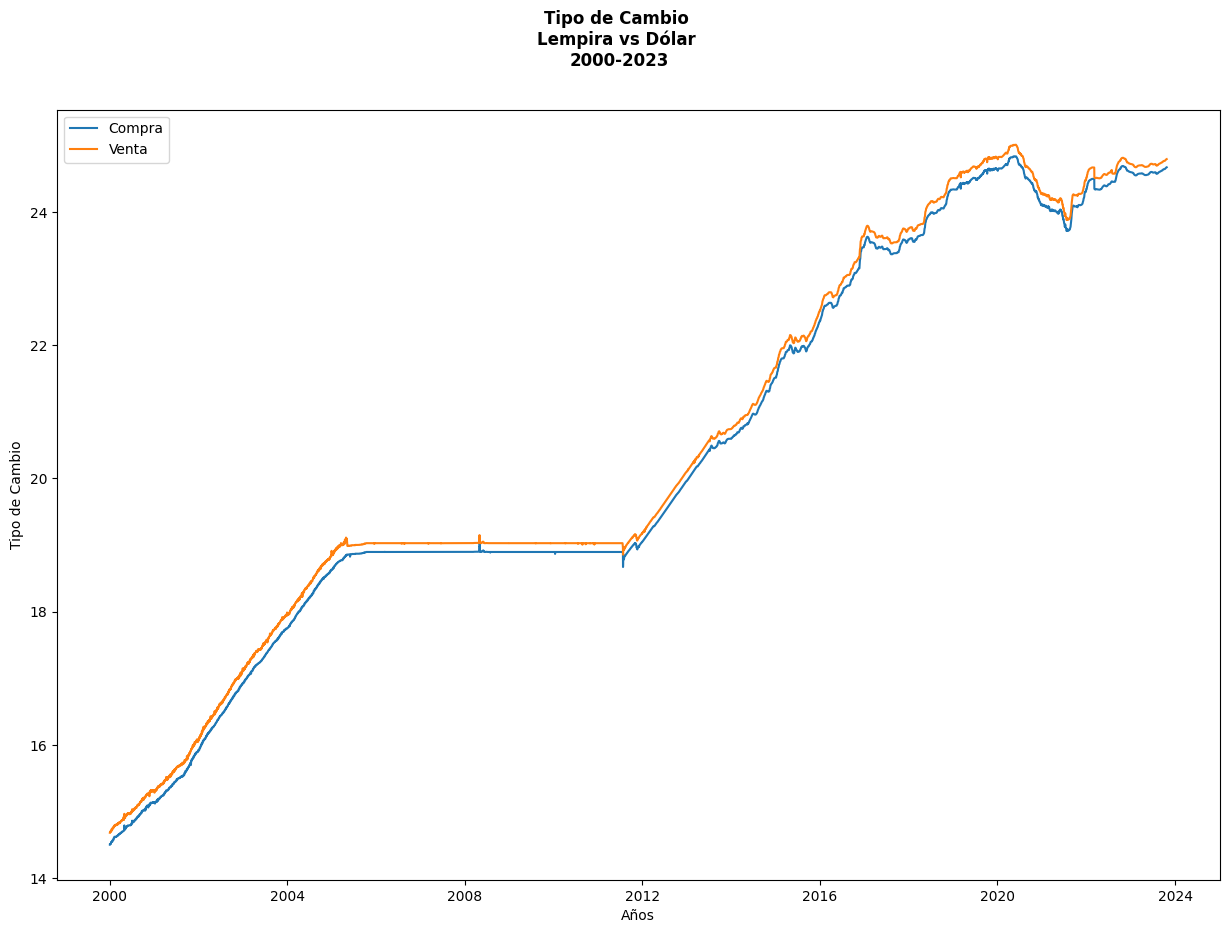

In [ ]:
#Crearemos un gráfico de linea de los valores de compra y venta a través del tiempo
plt.rc('figure', figsize = (15,10))
plt.suptitle('Tipo de Cambio \nLempira vs Dólar \n2000-2023', ha='center', fontweight ="bold")
plt.plot(tipo_de_cambio_limpio.index, tipo_de_cambio_limpio['Compra'], label='Compra',)
plt.plot(tipo_de_cambio_limpio.index, tipo_de_cambio_limpio['Venta'], label='Venta')
plt.xlabel('Años')
plt.ylabel('Tipo de Cambio')
plt.legend(loc = 'upper left')
clear_output()
plt.show()

#Pruebas de Normalidad
Primero filtraremos los datos por fecha desde el 2018 a la fecha actual

In [ ]:
seleccion = tipo_de_cambio_limpio.index > "2017-12-31"
tipo_de_cambio_filtrado = tipo_de_cambio_limpio.loc[seleccion]
tipo_de_cambio_filtrado

,Compra,Venta,Rentabilidad_Compra,Rentabilidad_Venta
Fecha,,,,
2018-01-02,23.5879,23.7530,0.000000,0.000000
2018-01-03,23.5886,23.7537,0.002968,0.002947
2018-01-04,23.5892,23.7543,0.002544,0.002526
2018-01-05,23.5898,23.7549,0.002544,0.002526
2018-01-08,23.5926,23.7577,0.011869,0.011786
...,...,...,...,...
2023-10-18,24.6631,24.7864,0.006893,0.006859
2023-10-19,24.6648,24.7881,0.006893,0.006858
2023-10-20,24.6665,24.7898,0.006892,0.006858


## Normalidad (de la rentabilidad de Compra) de manera gráfica
Primero veremos el histograma de la distribución, así como una "prueba de Normalidad" gráfica para estimar si corresponde a la distribución Normal

Ahora crearemos el histograma con los datos de la rentabilidad compra

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.700e+01,
        1.329e+03, 7.900e+01, 4.000e+00, 1.000e+00]),
 array([-0.59945148, -0.50764657, -0.41584166, -0.32403675, -0.23223184,
        -0.14042693, -0.04862202,  0.04318289,  0.1349878 ,  0.22679271,
         0.31859762]),
 <BarContainer object of 10 artists>)

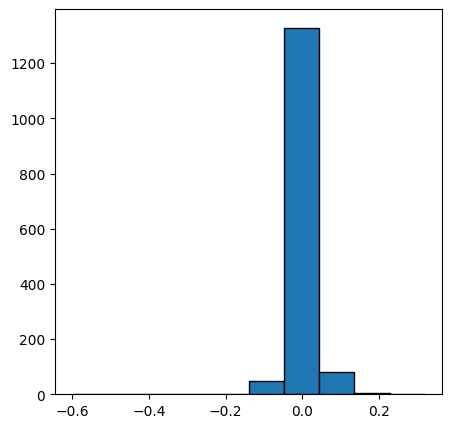

In [ ]:
plt.rc('figure', figsize = (5,5))
plt.hist(tipo_de_cambio_filtrado['Rentabilidad_Compra'], edgecolor = 'black', linewidth=1)

Ahora crearemos el gráfico Quantil-Quantile para corroborar normalidad de los datos

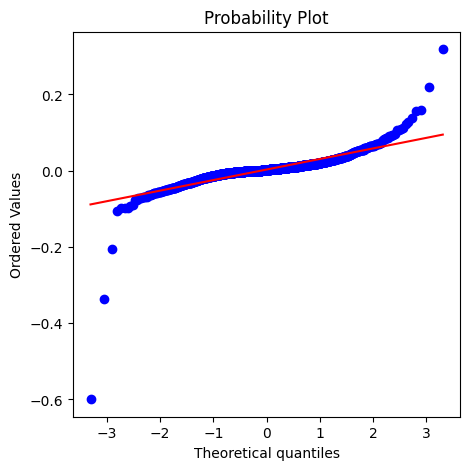

In [ ]:
import pylab
import scipy.stats as stats

plt.rc('figure', figsize = (5,5))
stats.probplot(tipo_de_cambio_filtrado['Rentabilidad_Compra'], dist='norm', plot=pylab)
pylab.show()

De manera gráfica podemos intuir que la distribución no es normal, ya que tiene varios puntos fuera de la recta y la distribución tampoco simula la campana de Gauss, vamos a confirmar nuestras ideas mediante la prueba de normalidad de Shapiro.

##Prueba de Shapiro
En la prueba de Shapiro si se tiene que p_value>0.05 significa que la distribución es normal, de lo contrario no.

In [ ]:
from scipy.stats import shapiro
estadistico, p_value = shapiro(tipo_de_cambio_filtrado['Rentabilidad_Compra'])
print('Estadístico= %.3f, p_value= %.3f' % (estadistico, p_value))

Estadístico= 0.689, p_value= 0.000


Haremos lo mismo con los datos de rentabilidad de Venta

## Normalidad (de la rentabilidad de Venta) de manera gráfica
Primero veremos el histograma de la distribución, así como una "prueba de Normalidad" gráfica para estimar si corresponde a la distribución Normal

Ahora crearemos el histograma con los datos de la rentabilidad venta

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.700e+01,
        1.328e+03, 7.900e+01, 4.000e+00, 1.000e+00]),
 array([-0.59975742, -0.50789905, -0.41604068, -0.32418231, -0.23232394,
        -0.14046557, -0.0486072 ,  0.04325116,  0.13510953,  0.2269679 ,
         0.31882627]),
 <BarContainer object of 10 artists>)

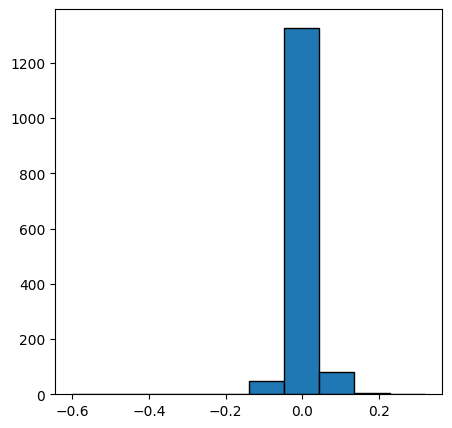

In [ ]:
plt.hist(tipo_de_cambio_filtrado['Rentabilidad_Venta'], edgecolor = 'black', linewidth=1)

Ahora crearemos el gráfico Quantil-Quantile para corroborar normalidad de los datos

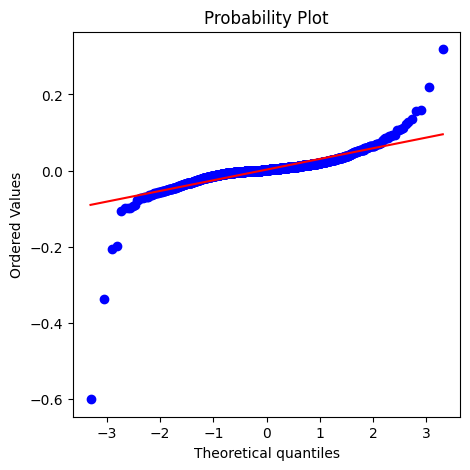

In [ ]:
import pylab
import scipy.stats as stats

plt.rc('figure', figsize = (5,5))
stats.probplot(tipo_de_cambio_filtrado['Rentabilidad_Venta'], dist='norm', plot=pylab)
pylab.show()

Por las formas gráficas, no parece que la distribución sea normal, ya que tiene varios puntos fuera de la recta y la distribución tampoco simula la campana de Gauss, vamos a confirmar nuestras ideas mediante la prueba de normalidad de Shapiro.

##Prueba de Shapiro
En el test de Shapiro-Wilks si se tiene que p_value>0.05 significa que la distribución puede ser normal, de lo contrario (p_value<0.05) significa con seguridad de que no es una distribución normal.

In [ ]:
from scipy.stats import shapiro
estadistico, p_value = shapiro(tipo_de_cambio_filtrado['Rentabilidad_Venta'])
print('Estadístico= %.3f, p_value= %.3f' % (estadistico, p_value))

Estadístico= 0.688, p_value= 0.000


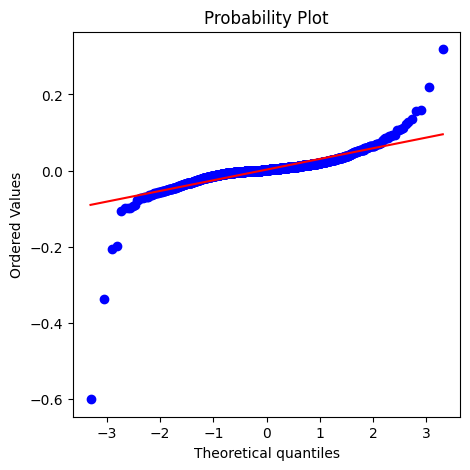

In [ ]:
import pylab
import scipy.stats as stats

plt.rc('figure', figsize = (5,5))
stats.probplot(tipo_de_cambio_filtrado['Rentabilidad_Venta'], dist='norm', plot=pylab)
pylab.show()

In [ ]:
seleccion = (tipo_de_cambio_limpio.index >= '2023-07-01')
tipo_de_cambio_limpio[seleccion]

,Compra,Venta,Rentabilidad_Compra,Rentabilidad_Venta
Fecha,,,,
2023-07-03,24.5918,24.7148,-0.005693,-0.005664
2023-07-04,24.5909,24.7139,-0.003660,-0.003642
2023-07-05,24.5899,24.7128,-0.004067,-0.004451
2023-07-06,24.5901,24.7131,0.000813,0.001214
2023-07-07,24.5904,24.7134,0.001220,0.001214
...,...,...,...,...
2023-10-18,24.6631,24.7864,0.006893,0.006859
2023-10-19,24.6648,24.7881,0.006893,0.006858
2023-10-20,24.6665,24.7898,0.006892,0.006858


In [ ]:
import requests
from bs4 import BeautifulSoup

# Realiza una solicitud HTTP para obtener la página web
url = 'https://publicaciones.cnbs.gob.hn/dashboard/https%3A%2F%2Fapp.powerbi.com%2Fview%3Fr%3DeyJrIjoiMTUyOTU3YjctNDU4Zi00M2Q3LTgwZTAtMzg0Y2RmNDYzYjZiIiwidCI6ImZlNDA4MTE2LWZkMTMtNDhjMy04MzJiLTc5NDU3ZGNjNmUyMyJ9%26language%3Des%26formatLocale%3Des-HN'  # Reemplaza con la URL real
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}
respuesta = requests.get(url, headers=headers)
#print(respuesta.text)
# Analiza la página con BeautifulSoup y extrae los datos
#s=BeautifulSoup(respuesta.content, features="lxml")
soup = BeautifulSoup(respuesta.text, 'html.parser')
soup
# Encuentra y extrae los datos necesarios del informe


<!DOCTYPE html>

<html lang="es">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.cnbs.gob.hn/wp-content/uploads/2019/09/favicon.png" rel="shortcut icon" type="image/x-icon"/>
<title>Dashboard - Informes y cifras de las supervisadas</title>
<link href="/lib/bootstrap-5.1.1-dist/css/bootstrap.min.css" rel="stylesheet">
<link href="/css/cnbs.css" rel="stylesheet"/>
<link href="/css/essentials.css" rel="stylesheet"/>
<link href="/css/header-1.css" rel="stylesheet"/>
<link href="/css/layout.css" rel="stylesheet"/>
<link href="/css/extralayers.css" rel="stylesheet"/>
<link href="/css/settings.css" rel="stylesheet"/>
<link href="/css/site.css" rel="stylesheet"/>
<link href="/css/Style.css" rel="stylesheet"/>
<link href="/css/thirdparty.bundle.css" rel="stylesheet"/>
<script src="/js/thirdparty.bundle.js"></script>
</link></head>
<body style="padding-top: 0px;">
<!-- PRELOADER -->
<div id="preloader">
<div class="i

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

driver.get("https://app.powerbi.com/view?r=eyJrIjoiOGI5Yzg2MGYtZmNkNy00ZjA5LTlhYTYtZTJjNjg2NTY2YTlmIiwidCI6ImI1NDE0YTdiLTcwYTYtNGUyYi05Yzc0LTM1Yjk0MDkyMjk3MCJ9")

def scrape_powerbi_table(visual_container_number):
    table_xpath = "//*[@id='pvExplorationHost']/div/div/exploration/div/explore-canvas/div/div[2]/div/div[2]/div[2]/visual-container-repeat/visual-container[" + str(visual_container_number) + "]/transform/div/div[3]/div/visual-modern"
    scroll_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, table_xpath + "/div/div/div[2]/div[4]/div[2]")))
    col_names = [i.text for i in driver.find_elements(By.XPATH, table_xpath + "/div/div/div[2]/div[1]/div[2]/div[2]/div/div")]
    df = pd.DataFrame(columns = col_names)
    more_rows_left = True
    row_count = 2
    while more_rows_left == True:
        data = driver.find_elements(By.XPATH, table_xpath + "/div/div/div[2]/div[1]/div[4]/div/div[@aria-rowindex='" + str(row_count) + "']/div")
        current_row = [i.get_attribute("innerHTML") for i in data][1:]
        if not current_row:
            try:
                for i in range(10):
                    scroll_button.click()
                data = driver.find_elements(By.XPATH, table_xpath + "/div/div/div[2]/div[1]/div[4]/div/div[@aria-rowindex='" + str(row_count) + "']/div")
                current_row = [i.get_attribute("innerHTML") for i in data][1:]
            except Exception:
                break
        if not current_row:
            break
        df.loc[len(df)] = current_row
        row_count += 1
    return df

next_button = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, "//*[@id='embedWrapperID']/div[2]/logo-bar/div/div/div/logo-bar-navigation/span/button[2]")))

df1 = scrape_powerbi_table(8)
next_button.click()
df2 = scrape_powerbi_table(8)
df3 = scrape_powerbi_table(9)
next_button.click()
next_button.click()
df4 = scrape_powerbi_table(5)
df5 = scrape_powerbi_table(7)
next_button.click()
df6 = scrape_powerbi_table(9)
df7 = scrape_powerbi_table(10)
next_button.click()
next_button.click()
df8 = scrape_powerbi_table(2)
next_button.click()
df9 = scrape_powerbi_table(5)
df10 = scrape_powerbi_table(6)

driver.quit()

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Configura Chrome para funcionar en modo sin cabeza
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.binary_location = '/usr/bin/chromium-browser'

# Inicializa el controlador de Chrome
driver = webdriver.Chrome(options=chrome_options)

# Navega a la URL del informe
report_url = "https://app.powerbi.com/view?r=eyJrIjoiOGI5Yzg2MGYtZmNkNy00ZjA5LTlhYTYtZTJjNjg2NTY2YTlmIiwidCI6ImI1NDE0YTdiLTcwYTYtNGUyYi05Yzc0LTM1Yjk4"
driver.get(report_url)

# Define la función para extraer datos de una tabla
def scrape_powerbi_table(container_number):
    table_xpath = f"//*[@id='pvExplorationHost']/div/div/exploration/div/explore-canvas/div/div[2]/div/div[2]/div[2]/visual-container-repeat/visual-container[{container_number}]/transform/div/div[3]/div/visual-modern"
    time.sleep(1)

    # Intenta encontrar el botón de desplazamiento
    try:
        scroll_button = driver.find_element(By.XPATH, f"{table_xpath}/div/div/div[2]/div[4]/div[2]")
        driver.execute_script("arguments[0].scrollIntoView();", scroll_button)
    except:
        pass

    col_names = driver.find_elements(By.XPATH, f"{table_xpath}/div/div/div[2]/div[1]/div[2]/div[2]/div/div")
    col_names = [col.get_attribute("innerHTML").split("<")[0] for col in col_names]

    data_rows = []
    row_count = 2
    while True:
        data = driver.find_elements(By.XPATH, f"{table_xpath}/div/div/div[2]/div[1]/div[4]/div/div[@aria-rowindex='{row_count}']/div")
        current_row = [cell.get_attribute("innerHTML") for cell in data][1:]
        if len(current_row) == 0 or all(item is None for item in current_row):
            break
        data_rows.append(current_row)
        row_count += 1

    df = pd.DataFrame(data_rows, columns=col_names)
    return df

# Abre el navegador y espera a que cargue la página
driver.get(report_url)
time.sleep(15)

# Realiza la extracción de datos
dfs = []
for container_number in [8, 8, 9, 5, 7, 9, 10, 2, 5, 6]:
    df = scrape_powerbi_table(container_number)
    dfs.append(df)

# Puedes acceder a los DataFrames dfs[0], dfs[1], ..., dfs[9] para los resultados.

In [ ]:
#Para instalar selenium, solo usar una vez
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

def run_selenium_on_colab():
    """
    Function to run Selenium on Google Colab.

    This function sets up the Selenium WebDriver for Google Colab and opens a Chrome browser.

    Returns:
    - webdriver.Chrome:
        The Selenium WebDriver instance for the Chrome browser.
    """

    # Configura Chrome para funcionar en modo sin cabeza
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    # Inicializa el controlador de Chrome
    driver = webdriver.Chrome(options=chrome_options)

    return driver

In [ ]:
# Example usage of the run_selenium_on_colab function
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

driver = run_selenium_on_colab()
driver.get("https://app.powerbi.com/view?r=eyJrIjoiMTUyOTU3YjctNDU4Zi00M2Q3LTgwZTAtMzg0Y2RmNDYzYjZiIiwidCI6ImZlNDA4MTE2LWZkMTMtNDhjMy04MzJiLTc5NDU3ZGNjNmUyMyJ9&amp;language=es&amp;formatLocale=es-HN")

def scrape_powerbi_table(visual_container_number):
    table_xpath = "//*[@id='pvExplorationHost']/div/div/exploration/div/explore-canvas/div/div[2]/div/div[2]/div[2]/visual-container-repeat/visual-container[" + str(visual_container_number) + "]/transform/div/div[3]/div/visual-modern"
    scroll_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, table_xpath + "/div/div/div[2]/div[4]/div[2]")))
    col_names = [i.text for i in driver.find_elements(By.XPATH, table_xpath + "/div/div/div[2]/div[1]/div[2]/div[2]/div/div")]
    df = pd.DataFrame(columns = col_names)
    more_rows_left = True
    row_count = 2
    while more_rows_left == True:
        data = driver.find_elements(By.XPATH, table_xpath + "/div/div/div[2]/div[1]/div[4]/div/div[@aria-rowindex='" + str(row_count) + "']/div")
        current_row = [i.get_attribute("innerHTML") for i in data][1:]
        if not current_row:
            try:
                for i in range(10):
                    scroll_button.click()
                data = driver.find_elements(By.XPATH, table_xpath + "/div/div/div[2]/div[1]/div[4]/div/div[@aria-rowindex='" + str(row_count) + "']/div")
                current_row = [i.get_attribute("innerHTML") for i in data][1:]
            except Exception:
                break
        if not current_row:
            break
        df.loc[len(df)] = current_row
        row_count += 1
    return df

#next_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//*[@id='embedWrapperID']/div[2]/logo-bar/div/div/div/logo-bar-navigation/span/button[2]")))

#df1 = scrape_powerbi_table(8)
#next_button.click()
#df2 = scrape_powerbi_table(8)
#df3 = scrape_powerbi_table(9)
#next_button.click()
#next_button.click()
#df4 = scrape_powerbi_table(5)
#df5 = scrape_powerbi_table(7)
#next_button.click()
#df6 = scrape_powerbi_table(9)
#df7 = scrape_powerbi_table(10)
#next_button.click()
#next_button.click()
#df8 = scrape_powerbi_table(2)
#next_button.click()
#df9 = scrape_powerbi_table(5)
#df10 = scrape_powerbi_table(6)
print(driver.title)
driver.quit()

Microsoft Power BI


In [ ]:
# Example usage of the run_selenium_on_colab function
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

driver = run_selenium_on_colab()
driver.get("https://app.powerbi.com/view?r=eyJrIjoiMTUyOTU3YjctNDU4Zi00M2Q3LTgwZTAtMzg0Y2RmNDYzYjZiIiwidCI6ImZlNDA4MTE2LWZkMTMtNDhjMy04MzJiLTc5NDU3ZGNjNmUyMyJ9&amp;language=es&amp;formatLocale=es-HN")

tablas = driver.find_elements(By.TAG_NAME, 'table')

# Procesa las tablas, por ejemplo, extrayendo los datos en DataFrames de pandas
dataframes = []

for tabla in tablas:
    # Extrae las filas y columnas de la tabla
    filas = tabla.find_elements(By.TAG_NAME, 'tr')
    data = []

    for fila in filas:
        columnas = fila.find_elements(By.TAG_NAME, 'td')
        fila_data = [columna.text for columna in columnas]
        data.append(fila_data)

    # Convierte los datos de la tabla en un DataFrame de pandas
    df = pd.DataFrame(data[1:], columns=data[0])
    dataframes.append(df)
print(driver.title)
driver.quit()

Microsoft Power BI
